In [19]:
import numpy as np
import pandas as pd
import seaborn as sns


test = pd.read_csv("test_data.csv")


In [20]:
test.head()

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,tiempodeconstruido,vigilancia,vista,zonalavanderia,valoradministracion,valorventa,tipoinmueble,tiponegocio,latitud,longitud
0,877392,104.0,NaN,NaN,2.0,NaN,0,NaN,NaN,2.0,...,9 a 15 años,NaN,NaN,1.0,0.0,185000000.0,Casa,Venta,4.711503,-74.132378
1,201483,144.0,NaN,NaN,2.0,NaN,0,NaN,1.0,3.0,...,1 a 8 años,1.0,NaN,1.0,0.0,498000000.0,Casa,Venta,4.700643,-74.090080
2,188674,144.0,NaN,NaN,2.0,NaN,0,NaN,NaN,3.0,...,1 a 8 años,NaN,NaN,NaN,0.0,498000000.0,Casa,Venta,4.700580,-74.090080
3,1211067,145.0,NaN,NaN,2.0,NaN,0,NaN,1.0,3.0,...,9 a 15 años,1.0,NaN,1.0,0.0,519000000.0,Casa,Venta,4.702525,-74.091370
4,883437,145.0,NaN,NaN,2.0,NaN,0,NaN,1.0,3.0,...,9 a 15 años,1.0,NaN,1.0,0.0,517000000.0,Casa,Venta,4.701413,-74.093254


In [21]:
test.columns

Index(['id', 'area', 'ascensor', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuartoservicio', 'deposito', 'estrato', 'estudio',
       'garajes', 'gimnasio', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piscina', 'piso', 'porteria', 'remodelado',
       'saloncomunal', 'terraza', 'tiempodeconstruido', 'vigilancia', 'vista',
       'zonalavanderia', 'valoradministracion', 'valorventa', 'tipoinmueble',
       'tiponegocio', 'latitud', 'longitud'],
      dtype='object')

In [22]:
len(test)

53

In [23]:
from geopy.geocoders import Nominatim
import time

def getReverse(lat, lon):
    geolocator=Nominatim(user_agent="app_hack123456789")
    time.sleep(1)
    location= geolocator.reverse(str(lat)+","+str(lon))
    return location.raw

In [52]:
def getAVALUO_CAT_MZ(lat,lon):

    urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/avaluoscatastrales/MapServer/0/query?where=&text=&objectIds=&time=1609477200&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance=50&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=3&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=AVALUO_CAT_MZ&groupByFieldsForStatistics=MANZANA_ID&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    import urllib.request, json 
    with urllib.request.urlopen(urli) as url:
        js = json.loads(url.read().decode())
    ind=1
    while(len(js["features"])==0):
        urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/avaluoscatastrales/MapServer/0/query?where=&text=&objectIds=&time=1609477200&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance="+str(100*ind)+"&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=3&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=AVALUO_CAT_MZ&groupByFieldsForStatistics=MANZANA_ID&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    
        import urllib.request, json 
        with urllib.request.urlopen(urli) as url:
            js = json.loads(url.read().decode())
        ind=ind+1
    return js["features"][0]

def getAVALUO_CAT_MZ_I(lat,lon):

    urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/avaluoscatastrales/MapServer/1/query?where=&text=&objectIds=&time=&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance=50&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=3&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    import urllib.request, json 
    with urllib.request.urlopen(urli) as url:
        js = json.loads(url.read().decode())
    ind=1
    while(len(js["features"])==0):
        urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/avaluoscatastrales/MapServer/1/query?where=&text=&objectIds=&time=&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance="+str(100*ind)+"&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=3&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    
        import urllib.request, json 
        with urllib.request.urlopen(urli) as url:
            js = json.loads(url.read().decode())
        ind=ind+1
    return js["features"][0]
def getAVALUO_COM_MZ(lat,lon):

    urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/avaluoscomerciales/MapServer/0/query?where=&text=&objectIds=&time=1609477200&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance=50&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=3&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    import urllib.request, json 
    with urllib.request.urlopen(urli) as url:
        js = json.loads(url.read().decode())
    ind=1
    while(len(js["features"])==0):
        urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/avaluoscomerciales/MapServer/0/query?where=&text=&objectIds=&time=1609477200&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance="+str(100*ind)+"&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=3&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    
        import urllib.request, json 
        with urllib.request.urlopen(urli) as url:
            js = json.loads(url.read().decode())
        ind=ind+1
    return js["features"][0]
def getVALOR_REF_2020(lat,lon):

    urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/valorreferencia/MapServer/9/query?where=&text=&objectIds=&time=&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance=50&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    import urllib.request, json 
    with urllib.request.urlopen(urli) as url:
        js = json.loads(url.read().decode())
    ind=1
    while(len(js["features"])==0):
        urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/valorreferencia/MapServer/9/query?where=&text=&objectIds=&time=&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance="+str(100*ind)+"&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    
        import urllib.request, json 
        with urllib.request.urlopen(urli) as url:
            js = json.loads(url.read().decode())
        ind=ind+1
    return js["features"][0]



def getUSO(lat,lon):

    urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/usopredominante/MapServer/9/query?where=&text=&objectIds=&time=1609477200&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance=50&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    import urllib.request, json 
    with urllib.request.urlopen(urli) as url:
        js = json.loads(url.read().decode())
    ind=1
    while(len(js["features"])==0):
        urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/catastro/usopredominante/MapServer/9/query?where=&text=&objectIds=&time=1609477200&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelContains&distance="+str(100*ind)+"&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    
        import urllib.request, json 
        with urllib.request.urlopen(urli) as url:
            js = json.loads(url.read().decode())
        ind=ind+1
    return js["features"][0]
#Recaudo Predial por Sector 2018
def getPREDIAL(lat,lon):

    urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/ordenamientoterritorial/recaudopredial/MapServer/19/query?where=&text=&objectIds=&time=&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelIntersects&distance=50&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    import urllib.request, json 
    with urllib.request.urlopen(urli) as url:
        js = json.loads(url.read().decode())
    ind=1
    while(len(js["features"])==0):
        urli="https://serviciosgis.catastrobogota.gov.co/arcgis/rest/services/ordenamientoterritorial/recaudopredial/MapServer/19/query?where=&text=&objectIds=&time=&geometry=%7B%22x%22+%3A+"+str(lon)+"%2C+%22y%22+%3A+"+str(lat)+"%2C+%22spatialReference%22+%3A+%7B%22wkid%22+%3A+4326%7D%7D&geometryType=esriGeometryPoint&inSR=&spatialRel=esriSpatialRelIntersects&distance=+"+str(100*ind)+"&units=esriSRUnit_Meter&relationParam=&outFields=*&returnGeometry=false&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&havingClause=&returnIdsOnly=false&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=pjson"
    
        import urllib.request, json 
        with urllib.request.urlopen(urli) as url:
            js = json.loads(url.read().decode())
        ind=ind+1
    return js["features"][0]



In [54]:
neig=[]
quarter=[]
suburb=[]
avaluoc=[]
avaluocom=[]
valorref=[]
uso=[]
predial=[]
i=0
for row in test.itertuples(index=True, name='Pandas'):
    lat=row.latitud	
    lon=row.longitud
    rev=(getReverse(lat, lon))
    
    neig.append(rev["address"]["neighbourhood"])
    quarter.append(rev["address"]["quarter"])
    suburb.append(rev["address"]["suburb"])
    avaluoc.append(getAVALUO_CAT_MZ(lat, lon)['attributes']['AVALUO_CAT_MZ'])
    avaluocom.append(getAVALUO_COM_MZ(lat, lon)['attributes']["AVALUO_COM_MZ"])
    valorref.append(getVALOR_REF_2020(lat, lon)['attributes']["V_REF"])
    uso.append(getUSO(lat, lon)['attributes']["USO"])
    predial.append(getPREDIAL(lat, lon)['attributes']["RSCVPAGO"])
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


In [57]:
test["barrio"]=neig
test["upz"]=quarter
test["localidad"]=suburb
test["avaluotercatastral"]=avaluoc
test["avaluotercomercial"]=avaluocom
test["valorref"]=valorref
test["uso"]=uso
test["predial"]=predial

In [58]:
test.head(2)

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,latitud,longitud,barrio,upz,localidad,avaluotercatastral,avaluotercomercial,valorref,uso,predial
0,877392,104.0,NaN,NaN,2.0,NaN,0,NaN,NaN,2.0,...,4.711503,-74.132378,La Faena,UPZ Engativá,Localidad Engativá,1282500.0,1900000.0,2350000.0,RESIDENCIAL,5.965010e+08
1,201483,144.0,NaN,NaN,2.0,NaN,0,NaN,1.0,3.0,...,4.700643,-74.090080,Minuto de Dios,UPZ El Minuto de Dios,Localidad Engativá,1587492.0,2292440.0,2850000.0,RESIDENCIAL,3.576877e+09


In [59]:
test.columns

Index(['id', 'area', 'ascensor', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuartoservicio', 'deposito', 'estrato', 'estudio',
       'garajes', 'gimnasio', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piscina', 'piso', 'porteria', 'remodelado',
       'saloncomunal', 'terraza', 'tiempodeconstruido', 'vigilancia', 'vista',
       'zonalavanderia', 'valoradministracion', 'valorventa', 'tipoinmueble',
       'tiponegocio', 'latitud', 'longitud', 'barrio', 'upz', 'localidad',
       'avaluotercatastral', 'avaluotercomercial', 'valorref', 'uso',
       'predial'],
      dtype='object')

<AxesSubplot:>

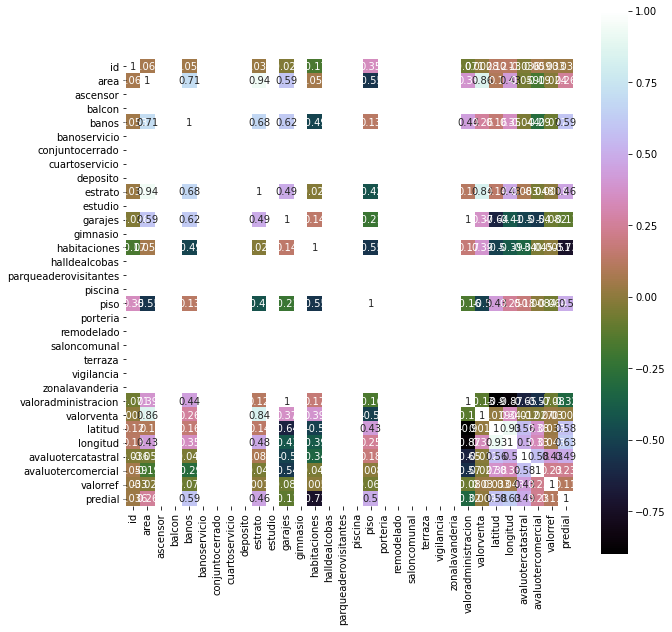

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
test.describe()
#Análisis de correlacion
correlation = test.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

In [61]:
test.describe()

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,vigilancia,zonalavanderia,valoradministracion,valorventa,latitud,longitud,avaluotercatastral,avaluotercomercial,valorref,predial
count,5.300000e+01,53.000000,0.0,14.0,53.000000,0.0,53.0,7.0,27.0,53.000000,...,17.0,29.0,45.000000,5.300000e+01,53.000000,53.000000,5.300000e+01,5.300000e+01,5.200000e+01,5.300000e+01
mean,6.960469e+05,153.471698,NaN,1.0,2.792453,NaN,0.0,1.0,1.0,3.094340,...,1.0,1.0,35333.333333,4.360057e+08,4.706348,-74.088809,1.343581e+06,2.159267e+06,2.456346e+06,5.066755e+09
std,3.584821e+05,28.876131,NaN,0.0,0.631192,NaN,0.0,0.0,0.0,0.449964,...,0.0,0.0,62870.718723,1.571573e+08,0.041581,0.035541,3.910383e+05,3.895121e+05,4.463272e+05,3.200197e+09
min,7.862200e+04,104.000000,NaN,1.0,2.000000,NaN,0.0,1.0,1.0,2.000000,...,1.0,1.0,0.000000,1.850000e+08,4.633404,-74.146896,6.210000e+05,7.500000e+05,7.800000e+05,5.965010e+08
25%,4.249850e+05,144.000000,NaN,1.0,2.000000,NaN,0.0,1.0,1.0,3.000000,...,1.0,1.0,0.000000,3.300000e+08,4.699873,-74.093254,8.997450e+05,2.154007e+06,2.400000e+06,3.231704e+09
50%,6.306310e+05,145.000000,NaN,1.0,3.000000,NaN,0.0,1.0,1.0,3.000000,...,1.0,1.0,0.000000,3.700000e+08,4.702654,-74.090080,1.528732e+06,2.333681e+06,2.500000e+06,3.576877e+09
75%,9.398430e+05,150.000000,NaN,1.0,3.000000,NaN,0.0,1.0,1.0,3.000000,...,1.0,1.0,0.000000,5.149900e+08,4.744143,-74.063286,1.587492e+06,2.400000e+06,2.550000e+06,8.085484e+09
max,1.368608e+06,230.000000,NaN,1.0,4.000000,NaN,0.0,1.0,1.0,5.000000,...,1.0,1.0,150000.000000,9.300000e+08,4.744805,-74.038290,2.099500e+06,2.553863e+06,2.900000e+06,1.695954e+10


In [62]:
from sklearn.impute import SimpleImputer
import numpy as np


# Creando un objeto ``SimpleImputer``
impute_zeros = SimpleImputer(
    missing_values=np.nan,  # Los valores faltantes son de tipo ``np.nan`` (estandar Pandas)
    strategy='constant',  # La estrategia escogida es reemplazar por una constante
    fill_value=0,  # La constante que será usada para reemmplazar los valores faltantes es un int64=0.
    verbose=0,
    copy=True
)

In [64]:
# Visualizando los datos faltantes del dataset antes de la segunda transformación (df_data_2)
print("Valores nulos antes de transformación SimpleImputer: \n\n{}\n".format(test.isnull().sum(axis = 0)))

# Aplicar la transformación ``SimpleImputer`` en el conjunto de datos base
impute_zeros.fit(X=test)

# Reconstrucción del nuevo DataFrame Pandas (df_data_3)
df = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=test
    ),  # El resultado SimpleImputer.transform(<<pandas dataframe>>) es una lista de listas
    columns=test.columns  # Las columnas originals deben ser conservadas en esta transformación
)

# Visualizndo los datos faltantes del dataset 
print("Valores nulos del dataset despues de la transformación SimpleImputer: \n\n{}\n".format(df.isnull().sum(axis = 0)))

Valores nulos antes de transformación SimpleImputer: 

id                       0
area                     0
ascensor                 0
balcon                   0
banos                    0
banoservicio             0
conjuntocerrado          0
cuartoservicio           0
deposito                 0
estrato                  0
estudio                  0
garajes                  0
gimnasio                 0
habitaciones             0
halldealcobas            0
parqueaderovisitantes    0
piscina                  0
piso                     0
porteria                 0
remodelado               0
saloncomunal             0
terraza                  0
tiempodeconstruido       0
vigilancia               0
vista                    0
zonalavanderia           0
valoradministracion      0
valorventa               0
tipoinmueble             0
tiponegocio              0
latitud                  0
longitud                 0
barrio                   0
upz                      0
localidad                0


In [65]:
df.tail()

,id,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,...,latitud,longitud,barrio,upz,localidad,avaluotercatastral,avaluotercomercial,valorref,uso,predial
48,726088,230.0,0,0.0,4.0,0,0,1.0,0.0,4.0,...,4.737032,-74.038290,Las Orquídeas,UPZ Toberín,Localidad Usaquén,1226105.0,2400000.0,2400000.0,RESIDENCIAL,4.932330e+09
49,752156,230.0,0,0.0,4.0,0,0,1.0,0.0,4.0,...,4.735844,-74.038440,Las Orquídeas,UPZ Toberín,Localidad Usaquén,737917.0,1393036.0,2400000.0,RESIDENCIAL,4.932330e+09
50,1055205,230.0,0,0.0,4.0,0,0,1.0,0.0,4.0,...,4.736058,-74.040634,Villa Magdala,UPZ Toberín,Localidad Usaquén,737917.0,1628470.0,2400000.0,RESIDENCIAL,6.181835e+09
51,1289402,230.0,0,0.0,4.0,0,0,1.0,0.0,4.0,...,4.737620,-74.040190,Las Orquídeas,UPZ Toberín,Localidad Usaquén,2019245.0,2400000.0,2400000.0,RESIDENCIAL,6.181835e+09
52,372796,230.0,0,0.0,4.0,0,0,1.0,0.0,5.0,...,4.702654,-74.058466,La Alhambra,UPZ La Alhambra,Localidad Suba,2099500.0,2470000.0,2500000.0,RESIDENCIAL,1.695954e+10


In [103]:
df2 = df.drop(columns=[ 'id',"latitud","longitud"], inplace=False)

<AxesSubplot:>

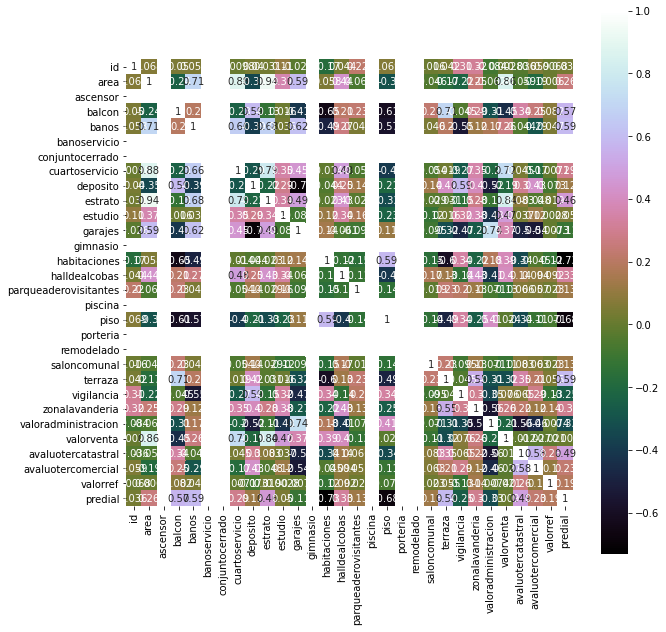

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
df2.describe()
#Análisis de correlacion
correlation = df2.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

In [104]:
df2['valorventa',  'avaluotercatastral',
       'avaluotercomercial', 'valorref', 'predial'].tail()

,area,ascensor,balcon,banos,banoservicio,conjuntocerrado,cuartoservicio,deposito,estrato,estudio,...,tipoinmueble,tiponegocio,barrio,upz,localidad,avaluotercatastral,avaluotercomercial,valorref,uso,predial
48,230.0,0,0.0,4.0,0,0,1.0,0.0,4.0,1.0,...,Casa,Venta,Las Orquídeas,UPZ Toberín,Localidad Usaquén,1226105.0,2400000.0,2400000.0,RESIDENCIAL,4.932330e+09
49,230.0,0,0.0,4.0,0,0,1.0,0.0,4.0,1.0,...,Casa,Venta,Las Orquídeas,UPZ Toberín,Localidad Usaquén,737917.0,1393036.0,2400000.0,RESIDENCIAL,4.932330e+09
50,230.0,0,0.0,4.0,0,0,1.0,0.0,4.0,1.0,...,Casa,Venta,Villa Magdala,UPZ Toberín,Localidad Usaquén,737917.0,1628470.0,2400000.0,RESIDENCIAL,6.181835e+09
51,230.0,0,0.0,4.0,0,0,1.0,0.0,4.0,1.0,...,Casa,Venta,Las Orquídeas,UPZ Toberín,Localidad Usaquén,2019245.0,2400000.0,2400000.0,RESIDENCIAL,6.181835e+09
52,230.0,0,0.0,4.0,0,0,1.0,0.0,5.0,1.0,...,Casa,Venta,La Alhambra,UPZ La Alhambra,Localidad Suba,2099500.0,2470000.0,2500000.0,RESIDENCIAL,1.695954e+10


In [105]:
df2.columns

Index(['area', 'ascensor', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuartoservicio', 'deposito', 'estrato', 'estudio',
       'garajes', 'gimnasio', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piscina', 'piso', 'porteria', 'remodelado',
       'saloncomunal', 'terraza', 'tiempodeconstruido', 'vigilancia', 'vista',
       'zonalavanderia', 'valoradministracion', 'valorventa', 'tipoinmueble',
       'tiponegocio', 'barrio', 'upz', 'localidad', 'avaluotercatastral',
       'avaluotercomercial', 'valorref', 'uso', 'predial'],
      dtype='object')

In [106]:
# Columnas One-hot-encoding del dataset usando el metodo de Pandas ``get_dummies``  (demontración)
df3 = pd.get_dummies(df2, columns=['tipoinmueble',
       'tiponegocio', 'barrio', 'upz', 'localidad', 'uso', "vista",'tiempodeconstruido'])

In [107]:
df3.columns

Index(['area', 'ascensor', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuartoservicio', 'deposito', 'estrato', 'estudio',
       'garajes', 'gimnasio', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piscina', 'piso', 'porteria', 'remodelado',
       'saloncomunal', 'terraza', 'vigilancia', 'zonalavanderia',
       'valoradministracion', 'valorventa', 'avaluotercatastral',
       'avaluotercomercial', 'valorref', 'predial', 'tipoinmueble_Casa',
       'tiponegocio_Venta', 'barrio_Gilmar', 'barrio_La Alhambra',
       'barrio_La Faena', 'barrio_La Serena', 'barrio_Las Orquídeas',
       'barrio_Marandú', 'barrio_Minuto de Dios', 'barrio_Pio XII',
       'barrio_Villa Magdala', 'upz_UPZ Britalia', 'upz_UPZ Castilla',
       'upz_UPZ El Minuto de Dios', 'upz_UPZ Engativá', 'upz_UPZ La Alhambra',
       'upz_UPZ Toberín', 'localidad_Localidad Engativá',
       'localidad_Localidad Kennedy', 'localidad_Localidad Suba',
       'localidad_Localidad Usaquén'

In [ ]:
for i in df3.columns:
    if(i!='valorventa'):
        df3.boxplot(column=i, by='valorventa', figsize=(20,5))

In [108]:
df3.columns

Index(['area', 'ascensor', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuartoservicio', 'deposito', 'estrato', 'estudio',
       'garajes', 'gimnasio', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piscina', 'piso', 'porteria', 'remodelado',
       'saloncomunal', 'terraza', 'vigilancia', 'zonalavanderia',
       'valoradministracion', 'valorventa', 'avaluotercatastral',
       'avaluotercomercial', 'valorref', 'predial', 'tipoinmueble_Casa',
       'tiponegocio_Venta', 'barrio_Gilmar', 'barrio_La Alhambra',
       'barrio_La Faena', 'barrio_La Serena', 'barrio_Las Orquídeas',
       'barrio_Marandú', 'barrio_Minuto de Dios', 'barrio_Pio XII',
       'barrio_Villa Magdala', 'upz_UPZ Britalia', 'upz_UPZ Castilla',
       'upz_UPZ El Minuto de Dios', 'upz_UPZ Engativá', 'upz_UPZ La Alhambra',
       'upz_UPZ Toberín', 'localidad_Localidad Engativá',
       'localidad_Localidad Kennedy', 'localidad_Localidad Suba',
       'localidad_Localidad Usaquén'

In [109]:
from sklearn.model_selection import train_test_split


df4=df3[['area', 'ascensor', 'balcon', 'banos', 'banoservicio',
       'conjuntocerrado', 'cuartoservicio', 'deposito', 'estrato', 'estudio',
       'garajes', 'gimnasio', 'habitaciones', 'halldealcobas',
       'parqueaderovisitantes', 'piscina', 'piso', 'porteria', 'remodelado',
       'saloncomunal', 'terraza', 'vigilancia', 'zonalavanderia',
       'valoradministracion', 'valorventa', 'avaluotercatastral',
       'avaluotercomercial', 'valorref', 'predial', 'tipoinmueble_Casa',
       'tiponegocio_Venta', 'barrio_Gilmar', 'barrio_La Alhambra',
       'barrio_La Faena', 'barrio_La Serena', 'barrio_Las Orquídeas',
       'barrio_Marandú', 'barrio_Minuto de Dios', 'barrio_Pio XII',
       'barrio_Villa Magdala', 'upz_UPZ Britalia', 'upz_UPZ Castilla',
       'upz_UPZ El Minuto de Dios', 'upz_UPZ Engativá', 'upz_UPZ La Alhambra',
       'upz_UPZ Toberín', 'localidad_Localidad Engativá',
       'localidad_Localidad Kennedy', 'localidad_Localidad Suba',
       'localidad_Localidad Usaquén', 'uso_OTROS', 'uso_RESIDENCIAL',
       'vista_0', 'vista_Exterior', 'tiempodeconstruido_1 a 8 años',
       'tiempodeconstruido_16 a 30 años', 'tiempodeconstruido_9 a 15 años',
       'tiempodeconstruido_Entre 10 y 20 años',
       'tiempodeconstruido_Más de 20 años']]

X_train, X_test, y_train, y_test = train_test_split(df4, df3["valorventa"], test_size=0.20)

In [110]:
# Método para creacion de modelos 
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier



dtc = LinearRegression().fit(X_train, y_train)



In [117]:
y_pred = dtc.predict(X_test)

In [120]:
y_pred

array([4.98e+08, 3.70e+08, 7.49e+08, 3.60e+08, 3.30e+08, 5.20e+08,
       2.90e+08, 3.70e+08, 7.99e+08, 5.10e+08, 2.15e+08])

In [113]:
from sklearn.metrics import explained_variance_score

explained_variance_score(y_test, y_pred) 

1.0

In [114]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

4.68312257660066e-14

In [115]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)  

1.0

In [112]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['`Positivo` Correto', '`Negativo` Errado', 'Falso `Positivo`', '`Negativo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
URLs:
https://geomedellin-m-medellin.opendata.arcgis.com/datasets/opendata-catastro-ctm12?geometry=-75.796%2C6.198%2C-75.327%2C6.317&selectedAttribute=INDICADOR_UR
https://serpapi.com/
https://maptastik.medium.com/remote-geojson-to-geodataframe-19c3c1282a64

web
https://realpython.com/beautiful-soup-web-scraper-python/

machine l
https://afhuertassh.medium.com/machine-learning-y-finca-ra%C3%ADz-en-bogot%C3%A1-b64562fe4c02
https://github.com/CristhianBoujon/ml-house-price-prediction
https://medium.com/datos-y-ciencia/proyecto-machine-learning-predicci%C3%B3n-de-precios-de-viviendas-en-boston-con-regresi%C3%B3n-e8655e6c3655


SyntaxError: invalid syntax (<ipython-input-11-16fd6e9dfae4>, line 1)